## 1. Importer des bibliothèques pertinentes 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import nan

from numpy import array
from numpy import diag
from numpy import zeros
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import plot_confusion_matrix

## Function 

In [2]:
# 
def missing_values_table(df):    
        mis_val = df.isnull().sum()        
        mis_val_percent = 100 * df.isnull().sum() / len(df)        
        type_column = df.dtypes        
        mis_val_table = pd.concat([mis_val, mis_val_percent, type_column], axis=1)        
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2:'type_column'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

def barplot(x_data, y_data, error_data = "", x_label="", y_label="", title=""):
    _, ax = plt.subplots()
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    # ax.errorbar(x_data, y_data, yerr = error_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title) 

    
def replace_missing_values(df, column, name_column):
    keys = df.key
    testing_keys = keys.to_numpy('str')  
    keys = keys.to_frame()    
    a = 0    
    for i, value in column.iteritems():
        if value is np.nan and len(testing_keys) > 0:    
           
            random_key = random.choice(testing_keys)
            #print("Len : ===> ", len(testing_keys)) 
            #print("Random Key : ===> ", random_key)        
            curr_value = df.loc[df['key'] == str(random_key) ]['to_replace'].values[0]
            #print("Curr value : ===> ", curr_value)            
            if curr_value > 0:                                            
                df.set_value( df.key == random_key, 'to_replace', curr_value - 1)             
                data.set_value( data.index == i, name_column, random_key ) 
                #print("Value set in data : ", data[name_column][i] )
                
            else:                          
                index_value = np.where(testing_keys == random_key)
        
                testing_keys = np.delete(testing_keys, index_value)               
            a = a + 1 
            #print("A : ===> ", a)
            #print('------------------------------')    

## 2. Charger les données 

In [3]:
data = pd.read_csv("Telecom_customer churn.csv")

In [4]:
info_about_data = missing_values_table(data)
info_about_data

Your selected dataframe has 100 columns.
There are 43 columns that have missing values.


,Missing Values,% of Total Values,type_column
numbcars,49366,49.4,float64
dwllsize,38308,38.3,object
HHstatin,37923,37.9,object
ownrent,33706,33.7,object
dwlltype,31909,31.9,object
lor,30190,30.2,float64
income,25436,25.4,float64
adults,23019,23.0,float64
infobase,22079,22.1,object
hnd_webcap,10189,10.2,object


## 3. Pre-traitement  

### 3.1 Remplacer les valeurs manquantes 

In [6]:
# remplace la valeur numérique par la moyenne
for index, row in info_about_data.iterrows():
    if row['type_column'] != "object":               
        # calculer la moyenne        
        mean_ =  data[index].mean()
        data[index].fillna(mean_, inplace=True)
missing_values_table(data)    

Your selected dataframe has 100 columns.
There are 18 columns that have missing values.


,Missing Values,% of Total Values,type_column
dwllsize,38308,38.3,object
HHstatin,37923,37.9,object
ownrent,33706,33.7,object
dwlltype,31909,31.9,object
infobase,22079,22.1,object
hnd_webcap,10189,10.2,object
prizm_social_one,7388,7.4,object
marital,1732,1.7,object
ethnic,1732,1.7,object
kid0_2,1732,1.7,object


/home/galaxy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


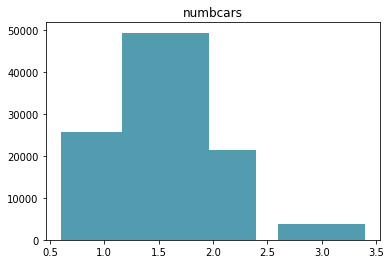

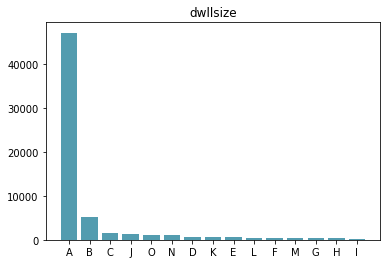

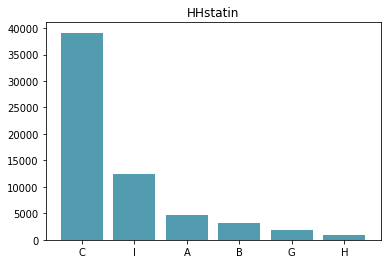

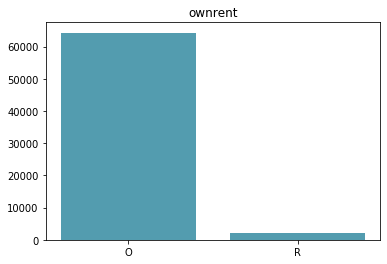

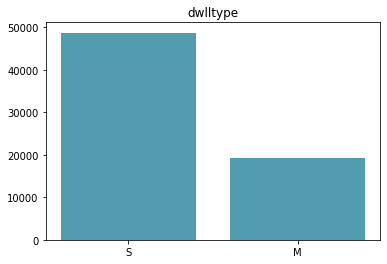

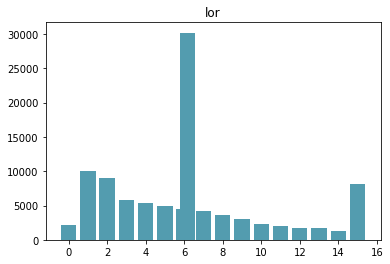

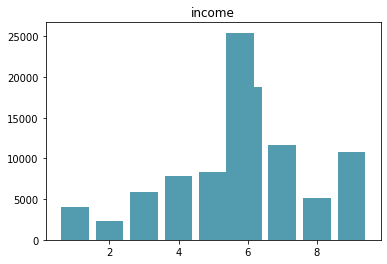

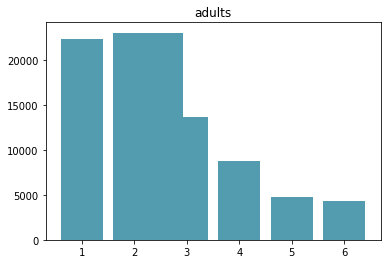

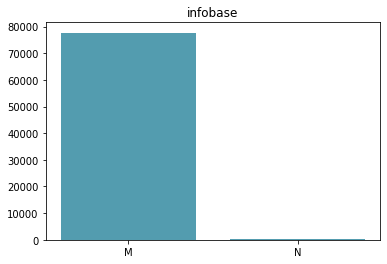

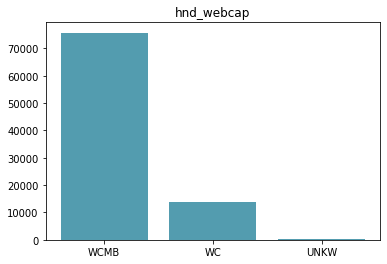

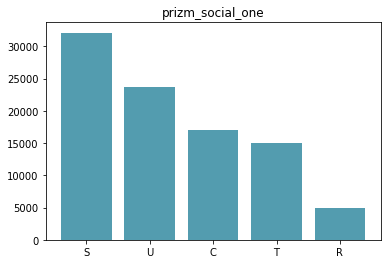

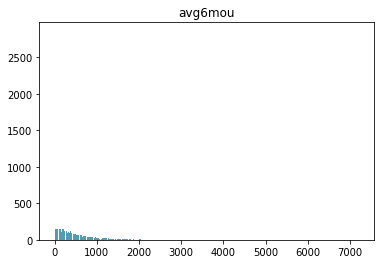

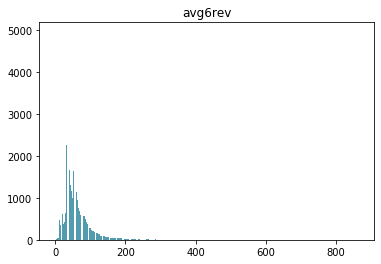

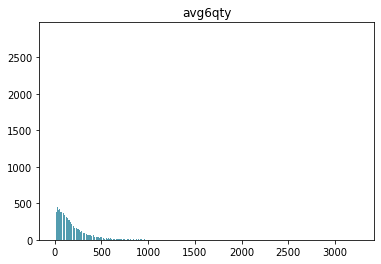

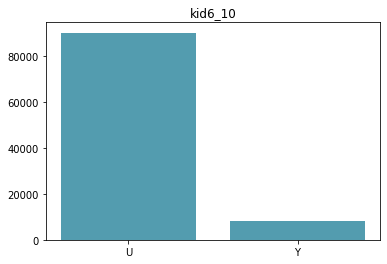

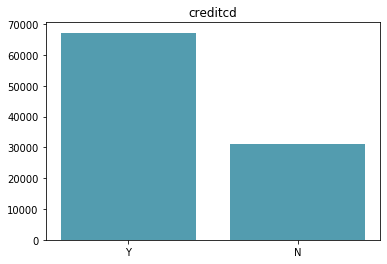

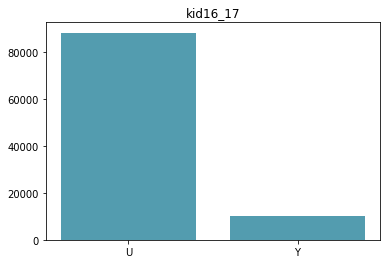

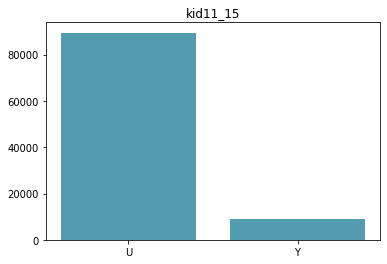

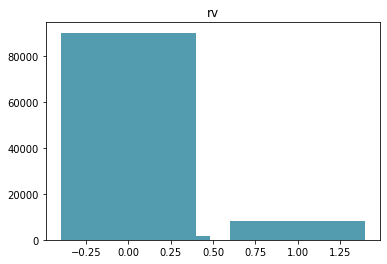

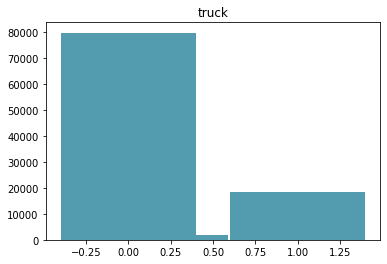

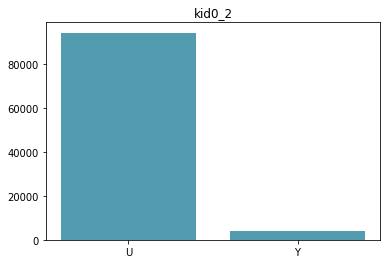

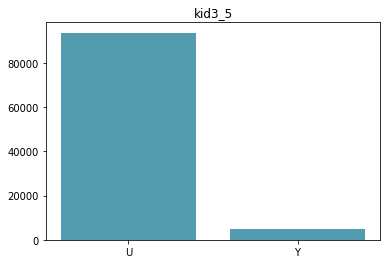

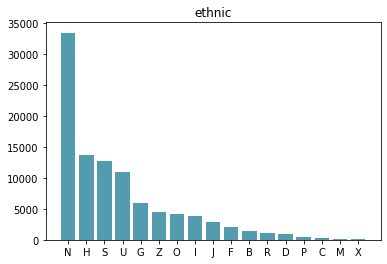

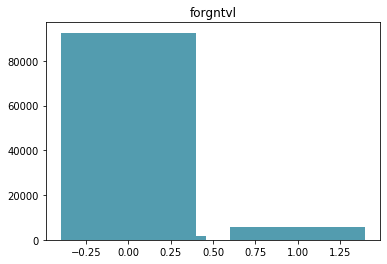

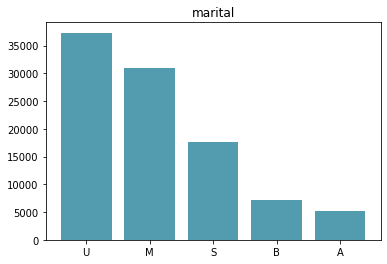

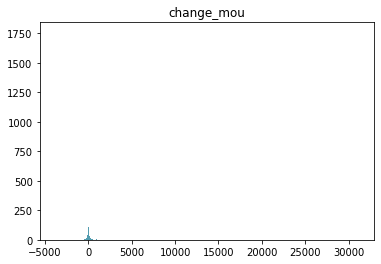

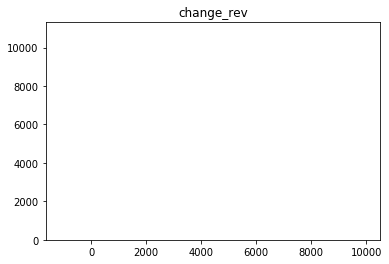

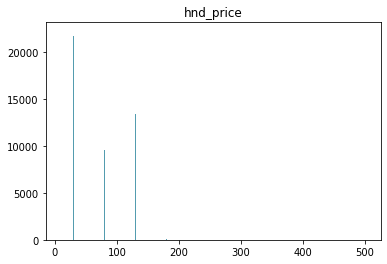

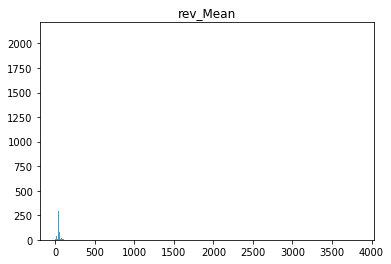

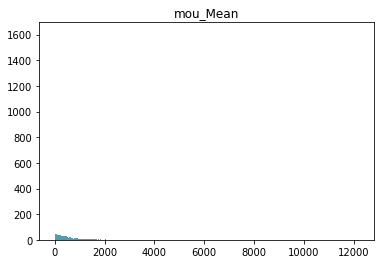

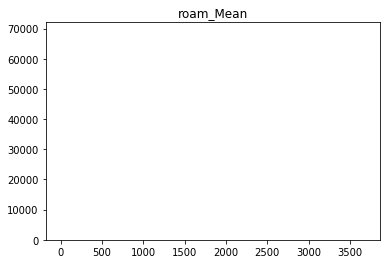

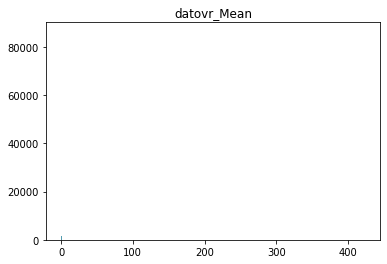

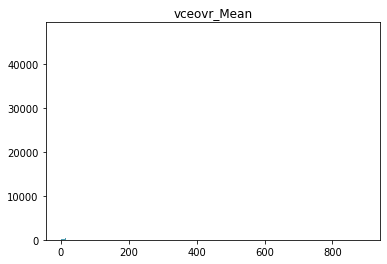

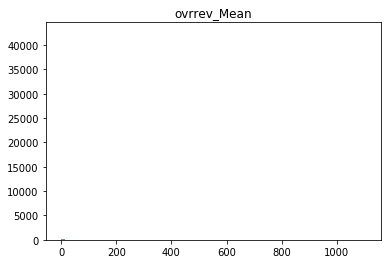

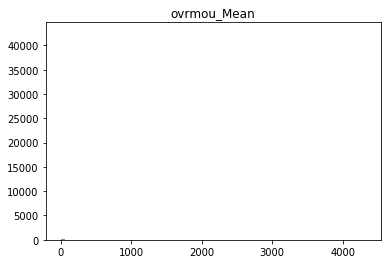

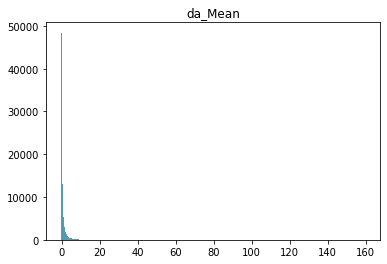

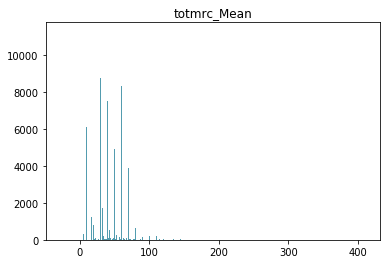

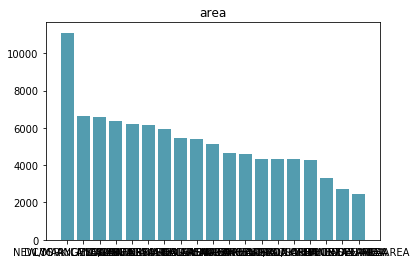

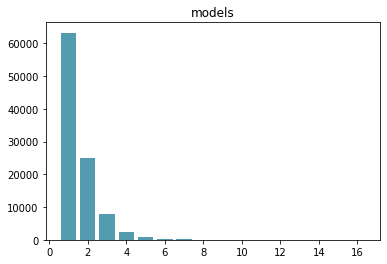

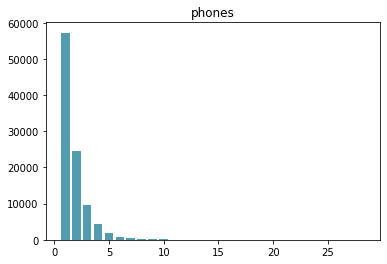

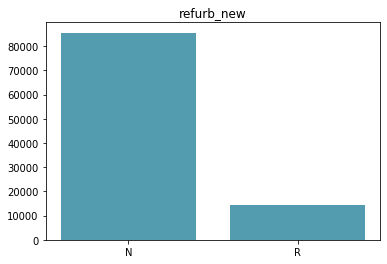

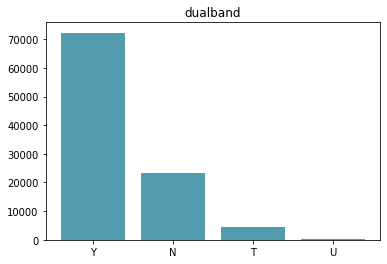

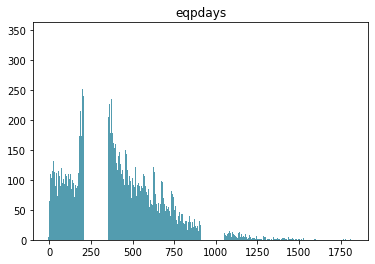

In [7]:
# visualiser les donnée de type objet qui contient des valeurs manquantes
for i, row in info_about_data.iterrows():  
    feature = data[i].value_counts()
    barplot(feature.index, feature.values, x_label="", y_label="", title= i) 

In [8]:
# remplacer les valeurs manquantes 
for i, row in info_about_data.iterrows():    
    column = data[row.name].value_counts() 
    info_column = {'key':  column.index,'value': column.values}
    df_info_column = pd.DataFrame(info_column, columns = ['key','value'])

    total_value = data[i].count()
    nb_missing = data.shape[0] - total_value 
    
    percentage = []
    value_to_replace = []
    
    for key, row in df_info_column.iterrows():
        per = round((row['value'] * 100 ) / total_value)
        percentage.append(per)

        to_replace =  round((per * nb_missing) / 100 ) 
        value_to_replace.append(to_replace)

    df_info_column['percentage'] = percentage
    df_info_column['to_replace'] = value_to_replace    
    replace_missing_values(df_info_column,data[i],i)

/home/galaxy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/home/galaxy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [9]:
# enregistrer le nouveau datasets
data.to_csv('testing_25_2020.csv')

In [10]:
df = data.copy()
df = df.dropna()
y_ = df['churn'] # output 

### 3.2 Enoding 

In [18]:
df_encoded = df.copy()
category_ = df.columns[df.dtypes.values == 'object']

In [19]:
cat_bool  = [ 'kid0_2','kid3_5', 'kid6_10', 'kid11_15', 'kid16_17']

In [21]:
for value in cat_bool: 
    df_encoded[value] = df_encoded[value].map({'U':0 , 'Y':1})

In [22]:
category_ = [x for x in category_ if x not in cat_bool]
df_encoded['creditcd'] = df_encoded['creditcd'].map({'N':0 , 'Y':1})

In [23]:
category_ = [ x for x in category_ if x not in 'creditcd' ]

In [24]:
cat_1 = ['dwlltype', 'ownrent', 'infobase', 'refurb_new', 'asl_flag']
df_encoded['dwlltype'] = df_encoded['dwlltype'].map({'S':0 , 'M':1})
df_encoded['ownrent'] = df_encoded['ownrent'].map({'R':0 , 'O':1})
df_encoded['infobase'] = df_encoded['infobase'].map({'M':0 , 'N':1})
df_encoded['refurb_new'] = df_encoded['refurb_new'].map({'R':0 , 'N':1})
df_encoded['asl_flag'] = df_encoded['asl_flag'].map({'N':0 , 'Y':1})

category_ = [x for x in category_ if x not in cat_1 ]

In [25]:
for val in category_: 
    name = df_encoded.groupby(val).size()/len(df_encoded)
    df_encoded.loc[:, val+'_encoded'] =  df_encoded[val].map(name)
    df_encoded = df_encoded.drop([val],axis=1)

In [30]:
cat_3 = ['new_cell_encoded', 'crclscod_encoded', 'prizm_social_one_encoded', 'area_encoded', 'dualband_encoded', 'hnd_webcap_encoded', 'marital_encoded', 'HHstatin_encoded', 'dwllsize_encoded', 'ethnic_encoded']
    
columns = df_encoded.columns
to_normalize_ = [ x for x in columns if x  not in cat_3 ]
df_scaled = df_encoded.copy()

99771

### 3.3 Normalization 

In [31]:
res = pd.DataFrame( )
for i in to_normalize_:
    x_array = np.array(df_scaled[i])
    normalized_X = preprocessing.normalize([x_array])   
    normalized_X = np.reshape(normalized_X, (df_scaled.shape[0],1))
   
    data_norm = []
    for value in normalized_X:
        data_norm.append(value)
    
    test_ = pd.DataFrame(data_norm, columns= [i+'_scaled'])
    # print(test_)
    res = pd.concat([res,test_], axis=1)

## Application SVD  

In [32]:
svd = TruncatedSVD(n_components=35)
svd.fit(res)
result = svd.transform(res)
result_normalised_df = result.copy()

## Choisire le nombre optimal de composant 

In [ ]:
# lie chaque composant avec leur score pour Trace par suite un graphe
y_score = []
x_nb_composants = []
for i in range(1, 90):        
    svd = TruncatedSVD(n_components=i)
    svd.fit(res)
    result = svd.transform(res)    
    #result_normalised_df = result.copy()    
    X_train, X_test, y_train, y_test = train_test_split(result, y_, test_size=0.2) 

    logisticReg = LogisticRegression()
    logisticReg.fit(X_train,y_train)
    score = logisticReg.score(X_test,y_test) 
    y_score.append(score)
    x_nb_composants.append(i)
    print(" score :",score)
    print(" composant :",i)
    print(" --------------",)

In [33]:
# 
X_train, X_test, y_train, y_test = train_test_split(result, y_, test_size=0.2) 

### Cross validation 

In [34]:
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)", results.mean(), results.std()) 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: %.3f (%.3f) 0.9714343191865951 0.0018178497624907115


### Confusion matrix 

In [40]:
logisticReg = LogisticRegression()
logisticReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
score = logisticReg.score(X_test,y_test) 
score

0.9743923828614383

[[10052    67]
 [  444  9392]]


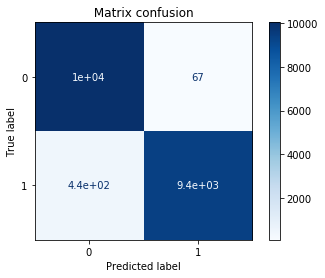

In [45]:
titles_options = [("Normalized confusion matrix", 'true')]
disp = plot_confusion_matrix(logisticReg, X_test, y_test,display_labels=[0,1],cmap=plt.cm.Blues)
disp.ax_.set_title(" Matrix confusion ")

print(disp.confusion_matrix)

plt.show()